C:\Users\joliphant\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joliphant\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joliphant\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joliphant\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

,magnitude,time,updated,felt,cdi,mmi,tsunami,sig,nst,dmin,rms,gap,depth,latitude,longitude,distanceKM,postcode,timezone
count,1137.000000,1.137000e+03,1.137000e+03,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,197.000000,1137.000000
mean,4.856675,1.712109e+12,1.716593e+12,414.408091,2.925242,4.320141,0.059807,432.698329,115.094107,1.342604,0.585974,55.055286,41.287300,27.308909,-3.930635,52.289358,83086.131980,21.741425
std,1.047840,1.143033e+10,9.671955e+09,5746.971362,2.562707,1.453949,0.237232,256.177844,91.877870,1.704364,0.308556,37.609237,87.866489,20.133139,118.043697,56.027469,12812.555204,440.864430
min,3.000000,1.687542e+12,1.693083e+12,0.000000,0.000000,1.000000,0.000000,138.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-43.706400,-179.807000,0.000000,8833.000000,-720.000000
25%,3.800000,1.701663e+12,1.707609e+12,0.000000,0.000000,4.000000,0.000000,234.000000,37.000000,0.100000,0.300000,30.000000,7.550000,24.195400,-104.452000,15.000000,79331.000000,-360.000000
50%,5.300000,1.713810e+12,1.719958e+12,2.000000,3.000000,4.000000,0.000000,449.000000,102.000000,0.680000,0.630000,49.000000,10.000000,31.667700,-68.682000,37.000000,79772.000000,-180.000000
75%,5.600000,1.722885e+12,1.725384e+12,24.000000,5.000000,5.000000,0.000000,518.000000,157.000000,2.061000,0.780000,68.000000,34.723000,37.497600,126.628000,61.000000,92530.000000,480.000000
max,7.600000,1.726661e+12,1.726672e+12,183786.000000,9.000000,9.000000,1.000000,2419.000000,619.000000,12.457000,2.520000,256.000000,639.503000,68.176100,179.972000,298.000000,99827.000000,780.000000


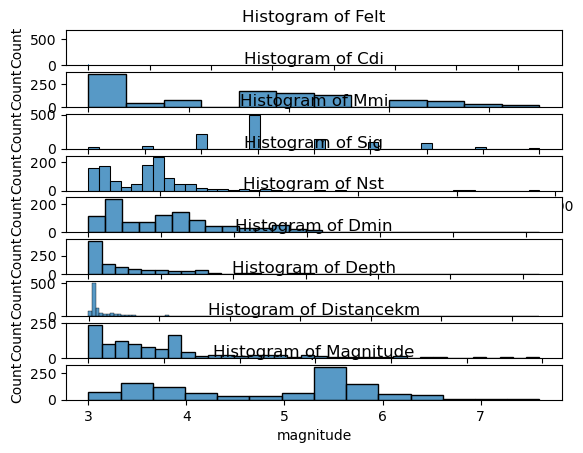

In [63]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#Read in dataset

df = pd.read_csv('../EarthquakeClassificationClustering/earthquakes.csv')

#Data cleaning to get rid of null values

df.dropna(subset=['felt', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'depth', 'distanceKM', 'magnitude'], inplace=True)

#EDA: Investigating the distribution of our features

columns = ['felt', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'depth', 'distanceKM', 'magnitude']
fig, ax = plt.subplots(len(columns))
for col, ax in zip(columns, ax):
    sns.histplot(data=df, x=col, ax=ax)
    ax.set_title(f"Histogram of {col.title()}")
    

df.describe()
#It's clear that our numerical features do not have a normal distribution, so we need to tranform our features before we do any analysis

In [64]:
#Here we use minmaxscaler to normalize our features
scaler = MinMaxScaler()
df[columns] = scaler.fit_transform(df[columns])

df.describe()

,magnitude,time,updated,felt,cdi,mmi,tsunami,sig,nst,dmin,rms,gap,depth,latitude,longitude,distanceKM,postcode,timezone
count,1137.000000,1.137000e+03,1.137000e+03,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,197.000000,1137.000000
mean,0.403625,1.712109e+12,1.716593e+12,0.002255,0.325027,0.415018,0.059807,0.129197,0.185936,0.107779,0.585974,55.055286,0.064927,27.308909,-3.930635,0.175468,83086.131980,21.741425
std,0.227791,1.143033e+10,9.671955e+09,0.031270,0.284745,0.181744,0.237232,0.112309,0.148430,0.136820,0.308556,37.609237,0.137344,20.133139,118.043697,0.188012,12812.555204,440.864430
min,0.000000,1.687542e+12,1.693083e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.706400,-179.807000,0.000000,8833.000000,-720.000000
25%,0.173913,1.701663e+12,1.707609e+12,0.000000,0.000000,0.375000,0.000000,0.042087,0.059774,0.008028,0.300000,30.000000,0.012192,24.195400,-104.452000,0.050336,79331.000000,-360.000000
50%,0.500000,1.713810e+12,1.719958e+12,0.000011,0.333333,0.375000,0.000000,0.136344,0.164782,0.054588,0.630000,49.000000,0.016022,31.667700,-68.682000,0.124161,79772.000000,-180.000000
75%,0.565217,1.722885e+12,1.725384e+12,0.000131,0.555556,0.500000,0.000000,0.166594,0.253635,0.165449,0.780000,68.000000,0.054666,37.497600,126.628000,0.204698,92530.000000,480.000000
max,1.000000,1.726661e+12,1.726672e+12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.520000,256.000000,1.000000,68.176100,179.972000,1.000000,99827.000000,780.000000


C:\Users\joliphant\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joliphant\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\joliphant\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joliphant\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

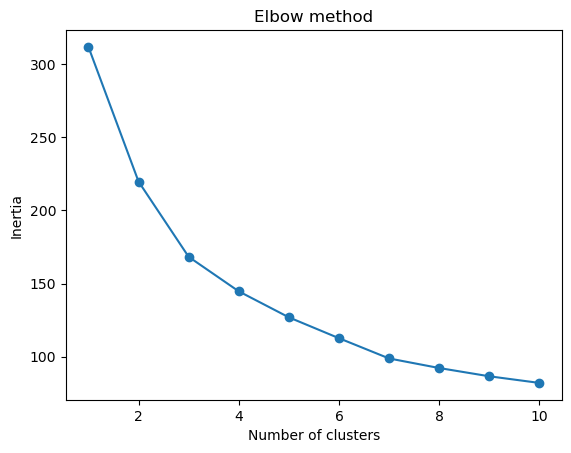

In [65]:
#Now we start our clustering model, firstly by finding the optimal amount of centroids K

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[columns])
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#We see that our "elbow" shows up at K=3, so we will use that as our number of centroids

C:\Users\joliphant\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joliphant\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


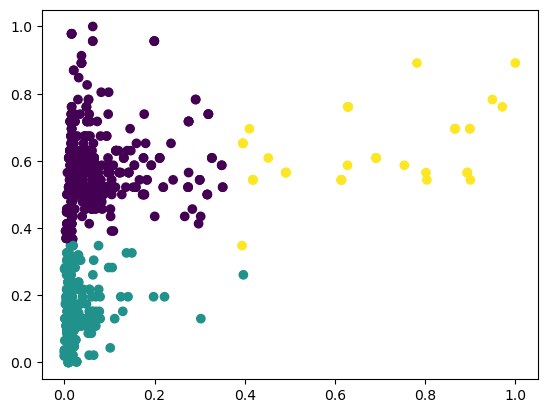

In [66]:
#Now we run our k-means model on our desired features: depth and magnitude
fit1 = ['depth', 'magnitude']
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[fit1])

plt.scatter(df['depth'], df['magnitude'], c=kmeans.labels_)
plt.show()

In [67]:
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

df['cluster'] = kmeans.labels_
cluster_stats = df.groupby('cluster').describe()
print(cluster_stats)


[[0.05709243 0.56954481]
 [0.02032944 0.15022883]
 [0.66832888 0.63043478]]
        magnitude                                                              \
            count      mean       std       min       25%       50%       75%   
cluster                                                                         
0           639.0  0.569545  0.102445  0.367391  0.521739  0.543478  0.608696   
1           456.0  0.150229  0.077872  0.000000  0.097283  0.130435  0.195652   
2            42.0  0.630435  0.105848  0.347826  0.565217  0.608696  0.695652   

                    time                                            \
              max  count          mean           std           min   
cluster                                                              
0        1.000000  639.0  1.706671e+12  1.037830e+10  1.688130e+12   
1        0.347826  456.0  1.720579e+12  5.984084e+09  1.693191e+12   
2        0.891304   42.0  1.702886e+12  1.416641e+10  1.687542e+12   

                

In [75]:
clusters = df.groupby('cluster')
cluster1 = clusters.get_group(0)
cluster2 = clusters.get_group(1)
cluster3 = clusters.get_group(2)

cluster1.describe()
cluster2.describe()
cluster3.describe()


,magnitude,time,updated,felt,cdi,mmi,tsunami,sig,nst,dmin,rms,gap,depth,latitude,longitude,distanceKM,postcode,timezone,cluster
count,42.000000,4.200000e+01,4.200000e+01,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,0.0,42.000000,42.0
mean,0.630435,1.702886e+12,1.707963e+12,0.000110,0.291005,0.202381,0.142857,0.179881,0.291407,0.211260,0.774524,33.785714,0.668329,7.630476,45.942081,0.298897,NaN,212.857143,2.0
std,0.105848,1.416641e+10,1.275721e+10,0.000529,0.176882,0.106755,0.354169,0.051964,0.122804,0.117269,0.162889,11.576966,0.192135,30.817051,106.344334,0.235108,NaN,403.299113,0.0
min,0.347826,1.687542e+12,1.693083e+12,0.000000,0.000000,0.000000,0.000000,0.082420,0.072698,0.045998,0.540000,17.000000,0.394047,-31.328200,-179.019000,0.000000,NaN,-720.000000,2.0
25%,0.565217,1.691615e+12,1.697166e+12,0.000005,0.111111,0.125000,0.000000,0.151249,0.223344,0.142410,0.690000,22.250000,0.491205,-22.884400,-63.656400,0.078859,NaN,-180.000000,2.0
50%,0.608696,1.696914e+12,1.702765e+12,0.000011,0.333333,0.250000,0.000000,0.166594,0.279483,0.178936,0.760000,35.000000,0.629018,-6.448300,116.593000,0.275168,NaN,480.000000,2.0
75%,0.695652,1.717003e+12,1.722976e+12,0.000027,0.444444,0.250000,0.000000,0.199036,0.396204,0.257686,0.800000,39.250000,0.866350,42.087300,137.610000,0.506711,NaN,540.000000,2.0
max,0.891304,1.726510e+12,1.726520e+12,0.003422,0.555556,0.375000,1.000000,0.411662,0.647819,0.567151,1.240000,56.000000,1.000000,52.462300,179.732000,0.704698,NaN,720.000000,2.0


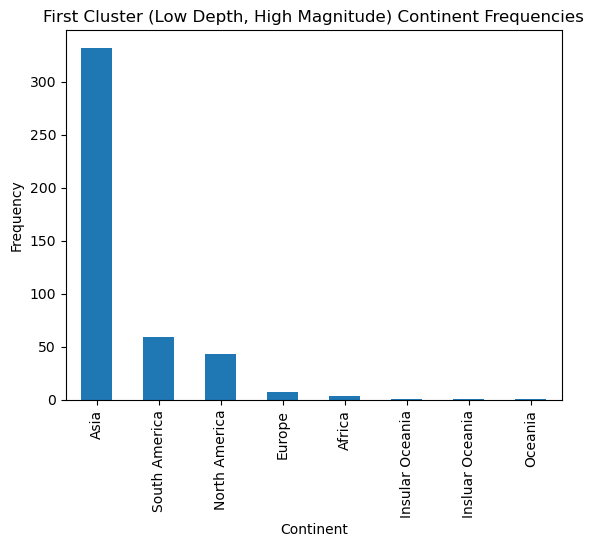

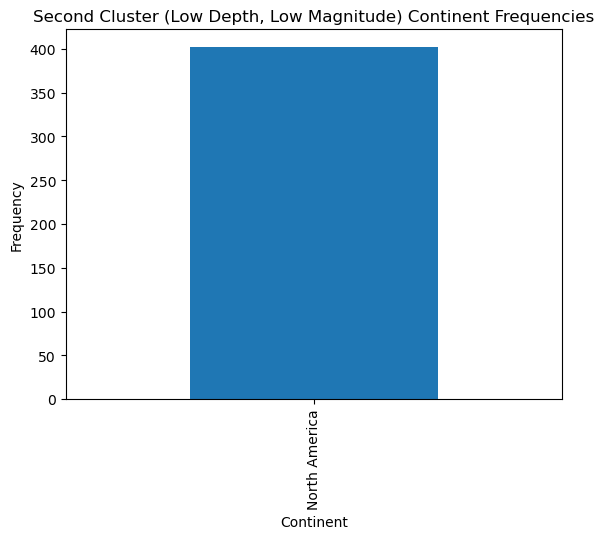

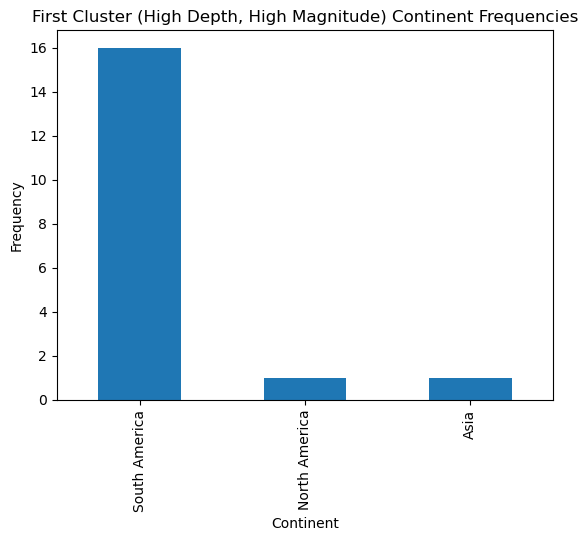

In [74]:
continents1 = cluster1['continent'].value_counts()
continents1.plot(kind='bar')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.title('First Cluster (Low Depth, High Magnitude) Continent Frequencies')
plt.show()

continents2 = cluster2['continent'].value_counts()
continents2.plot(kind='bar')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.title('Second Cluster (Low Depth, Low Magnitude) Continent Frequencies')
plt.show()

continents3 = cluster3['continent'].value_counts()
continents3.plot(kind='bar')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.title('First Cluster (High Depth, High Magnitude) Continent Frequencies')
plt.show()

#Cluster1 holds the majority of Asian earthquakes, with a high amount of South American Earthquakes
#Cluster2 holds the vast majority of North American earthquakes
#Cluster 3 a moderate amount of South American earthquakes


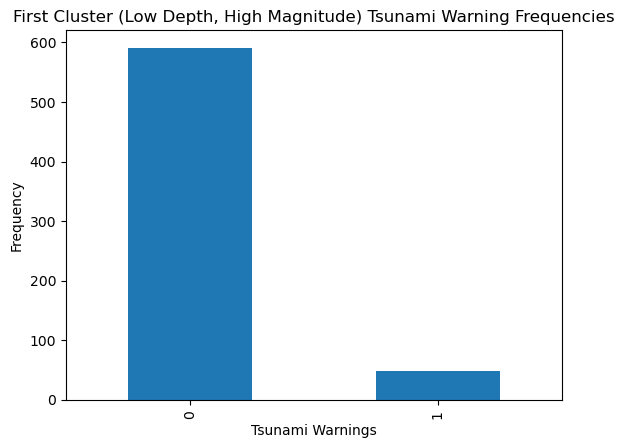

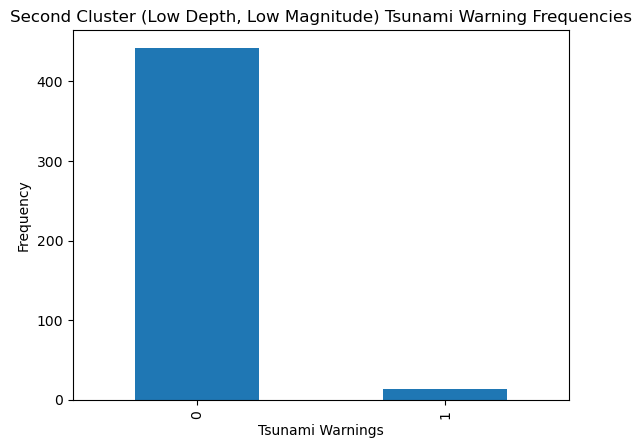

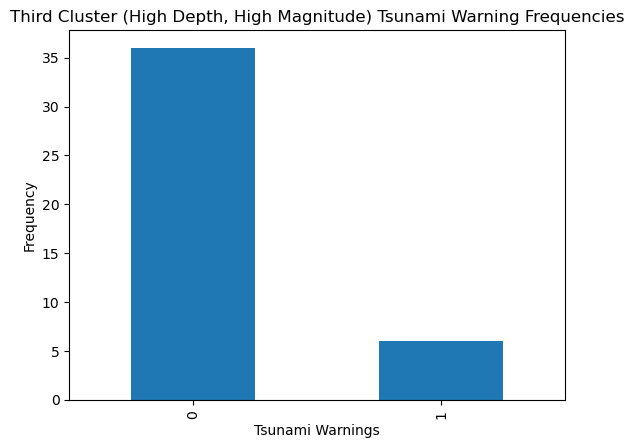

In [81]:
tsunami1 = cluster1['tsunami'].value_counts()
tsunami1.plot(kind='bar')
plt.xlabel('Tsunami Warnings')
plt.ylabel('Frequency')
plt.title('First Cluster (Low Depth, High Magnitude) Tsunami Warning Frequencies')
plt.show()

tsunami2 = cluster2['tsunami'].value_counts()
tsunami2.plot(kind='bar')
plt.xlabel('Tsunami Warnings')
plt.ylabel('Frequency')
plt.title('Second Cluster (Low Depth, Low Magnitude) Tsunami Warning Frequencies')
plt.show()

tsunami2 = cluster3['tsunami'].value_counts()
tsunami2.plot(kind='bar')
plt.xlabel('Tsunami Warnings')
plt.ylabel('Frequency')
plt.title('Third Cluster (High Depth, High Magnitude) Tsunami Warning Frequencies')
plt.show()

#All 3 clusters have very low tsunami warning frequencies


C:\Users\joliphant\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joliphant\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joliphant\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='distanceKM', ylabel='Count'>

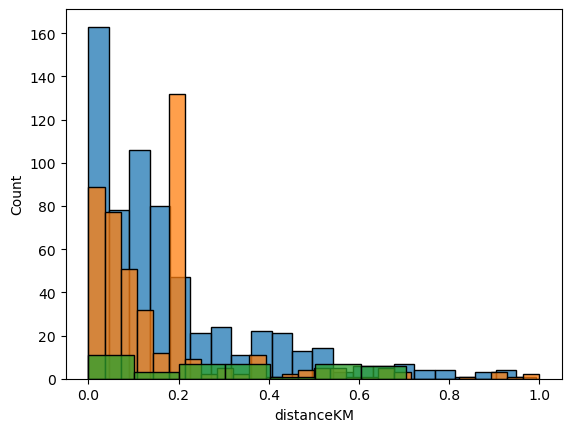

In [80]:
sns.histplot(data=cluster1, x='distanceKM')
sns.histplot(data=cluster2, x='distanceKM')
sns.histplot(data=cluster3, x='distanceKM')

#Clusters 1 and 2 have similar distributions of distance from civilization, with cluster 3 having a slightly more distributed frequency of farther quakes



C:\Users\joliphant\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joliphant\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joliphant\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sig', ylabel='Count'>

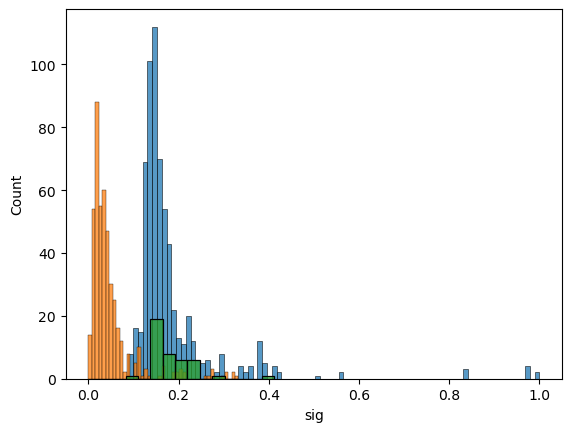

In [89]:
sns.histplot(data=cluster1, x='sig')
sns.histplot(data=cluster2, x='sig')
sns.histplot(data=cluster3, x='sig')

#Cluster 1 seems to have a significantly higher median significance score than cluster 2, which makes sense given mag and depth characteristics